In [11]:
from sktime.datasets import load_gunpoint
from sktime.classifiers.shapelet_based import MrSQMClassifier
from sklearn import metrics
import numpy as np

In [27]:
ds='MedicalImages'
ds_dir = '/home/thachln/myworkdir/UCR_TS_Archive_2015/'
# ds_dir = '/home/thachln/myworkdir/Mr-SEQL/data/CMJ/'

train_file = ds_dir + ds + '/' + ds + '_TRAIN' 
test_file = ds_dir + ds + '/' + ds + '_TEST' 

# load train data
train_data = np.genfromtxt(train_file,delimiter=',')
X_train = train_data[:,1:]
y_train = train_data[:,0]

test_data = np.genfromtxt(test_file,delimiter=',')
X_test = test_data[:,1:]
y_test = test_data[:,0]


In [28]:
counts = np.unique(y_test,return_counts = True)[1]
counts.max()/counts.sum()

0.5144736842105263

In [4]:
# Create mrseql object
# ms = MrSQMClassifier(selection = 40,symrepconfig = [{'method':'sax','window':60,'word':16,'alphabet':4}])
ms = MrSQMClassifier(selection = 1000)

# fit training data
ms.fit(X_train,y_train)


# prediction
predicted = ms.predict(X_test)

# Classification accuracy
print("Accuracy with mr-sqm: %2.3f" % metrics.accuracy_score(y_test, predicted))

Accuracy with mr-sqm: 0.616


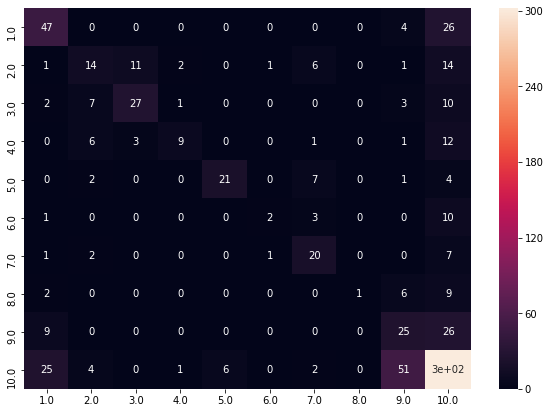

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, predicted), index = [i for i in ms.classes_],
                  columns = [i for i in ms.classes_])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [9]:
metrics.confusion_matrix(y_test, predicted)

array([[ 47,   0,   0,   0,   0,   0,   0,   0,   4,  26],
       [  1,  14,  11,   2,   0,   1,   6,   0,   1,  14],
       [  2,   7,  27,   1,   0,   0,   0,   0,   3,  10],
       [  0,   6,   3,   9,   0,   0,   1,   0,   1,  12],
       [  0,   2,   0,   0,  21,   0,   7,   0,   1,   4],
       [  1,   0,   0,   0,   0,   2,   3,   0,   0,  10],
       [  1,   2,   0,   0,   0,   1,  20,   0,   0,   7],
       [  2,   0,   0,   0,   0,   0,   0,   1,   6,   9],
       [  9,   0,   0,   0,   0,   0,   0,   0,  25,  26],
       [ 25,   4,   0,   1,   6,   0,   2,   0,  51, 302]])

Mr-SQM vs Mr-SEQL

In [ ]:
import pandas as pd



In [ ]:
sqm_df = pd.read_csv('~/myworkdir/csv/mr_sqm_exp2.csv').round(decimals=3)
seql_df = pd.read_csv('~/myworkdir/csv/UCR_mrseql_results.csv')
full_df = pd.merge(sqm_df, seql_df, on='Dataset')

In [ ]:
import os
rootdir = '/home/thachln/myworkdir/UCR_TS_Archive_2015/'

for ds in os.listdir(rootdir):
    data = np.genfromtxt(rootdir + ds + '/' + ds + '_TRAIN', delimiter=',')
    y = data[:,0]
    n = len(y)
    H = 0
    for ci in np.unique(y):        
        p = np.sum(y == ci)/n
        H += p*np.log(p)
    bl = -H/np.log(len(np.unique(y)))
    print(ds + ',' + str(bl))
    
    

In [ ]:
full_df[full_df['Dataset'] == 'Beef']

In [ ]:
y

In [ ]:
def chi2(ob1,ob2):   
    ep1 = (ob1 + ob2)*0.4
    ep2 = (ob1 + ob2)*0.6
    return ((ob1 - ep1)**2/ep1 + (ob2 - ep2)**2/ep2)

In [ ]:
ob1 = 3
ob2 = 2
print(chi2(ob1,ob2))
print(chi2(ob1,0))
print(chi2(0,ob2))



In [4]:
import os 
[ds for ds in os.listdir(ds_dir)]

['WordsSynonyms',
 'MoteStrain',
 'Wine',
 'Car',
 'Computers',
 'Two_Patterns',
 'StarLightCurves',
 'SmallKitchenAppliances',
 'FaceAll',
 'TwoLeadECG',
 'ECGFiveDays',
 'InlineSkate',
 'FacesUCR',
 '50words',
 'ScreenType',
 'Cricket_X',
 'Strawberry',
 'DistalPhalanxTW',
 'PhalangesOutlinesCorrect',
 'MiddlePhalanxOutlineAgeGroup',
 'uWaveGestureLibrary_X',
 'ToeSegmentation2',
 'CBF',
 'wafer',
 'Ham',
 'FordB',
 'ChlorineConcentration',
 'ProximalPhalanxOutlineCorrect',
 'Trace',
 'Passgraph',
 'Lighting7',
 'UWaveGestureLibraryAll',
 'ProximalPhalanxTW',
 'WormsTwoClass',
 'ShapesAll',
 'OliveOil',
 'Cricket_Z',
 'Plane',
 'LargeKitchenAppliances',
 'DistalPhalanxOutlineCorrect',
 'ECG5000',
 'synthetic_control',
 'Phoneme',
 'NonInvasiveFatalECG_Thorax1',
 'ItalyPowerDemand',
 'RefrigerationDevices',
 'NonInvasiveFatalECG_Thorax2',
 'InsectWingbeatSound',
 'BeetleFly',
 'MALLAT',
 'BirdChicken',
 'Symbols',
 'ArrowHead',
 'Adiac',
 'CinC_ECG_torso',
 'Lighting2',
 'Herring',
 '